<h1>1. Introduction</h1>
<p>This report is to investigate the data of people in Titanic and answer a series of questions:</p>
<ol>
<li type="none">a) Did richer people have more opportunity to survive?</li>
<li type="none">b) Were women given priority to the lifeboat in different classes?</li>
<li type="none">c) Did kids in more expensive class have more opportunity to survive?</li>
<li type="none">d) Was there any relationship between the percentage of surviving people and their age?</li>
</ol>
<p>The dataset used is titanic_data.csv including following information of people:</br>
    survived or not, ticket class, gender, age, number of siblings, number of parents, ticket number, passenger fare, cabin number, embarkedPort of embarkation. </p>

<h1>2. Create charts and graphs, build reports using jupyter notebook</h1>

In [8]:
#import necessary modules
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# read Titanic csv file into dataframe
data = pd.read_csv('titanic_data.csv')
print ('number of records in original data: ', len(data))

number of records in original data:  891


<p style="color:red"> The data we are going to investigate includes 891 people's information.</p>

<h2> 2.1  Did richer people have more opportunity to survive?</h2>

<p> To answer this question, we plot a histogram showing number of survived and dead people in different classes </p>

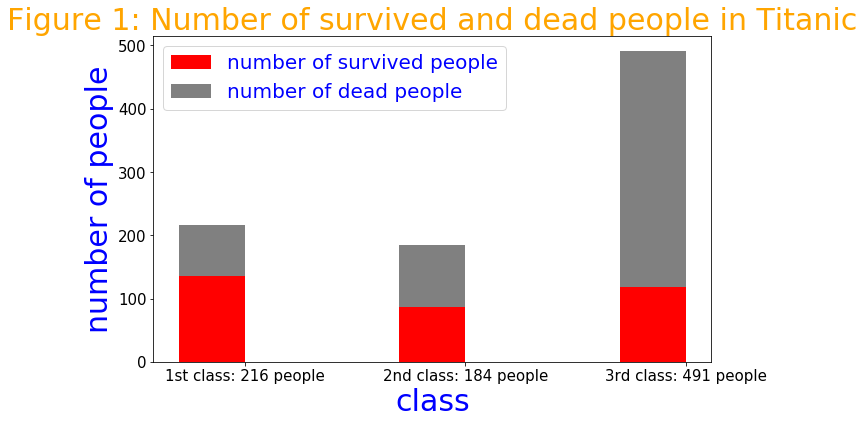

In [10]:
# group data file by class, get number of people in different classes 
num = data.groupby('Pclass').size()
list_num = list(num)

#Select survived/dead people to create new dataframe and then group it by class
#get number of survived/dead people in different classes 
num_sur = data[data.Survived==1].groupby('Pclass').size()
num_nosur = data[data.Survived==0].groupby('Pclass').size()

# plot histogram to show number of survived and dead people in different classes
ind = np.arange(3)
width=0.3
x=['1st class: '+str(list_num[0])+' people','2nd class: '+str(list_num[1])+' people','3rd class: '+str(list_num[2])+' people']
plt.figure(figsize=(10,6))
plt.bar(ind,num_sur,width,color='red',label=u'number of survived people')
plt.bar(ind,num_nosur,width,bottom=num_sur,color='grey',label=u'number of dead people')

plt.xlabel('class',color='b',fontsize=30)
plt.ylabel('number of people',color='b',fontsize=30)
plt.title('Figure 1: Number of survived and dead people in Titanic',size=15,color='orange',fontsize=30)
plt.xticks(ind+width/2,x,size=15)
plt.legend(fontsize=20)
plt.show()


<p style="color:red">The above histogram showed that approximately 75% of the people in the 1st class survived, 50% of the people in the 2nd class survived, 25% of the people in the 3rd class survived. </p>
<p style="color:red">So the answer for question a) is "Yes, richer people have more opportunity to survive".</p>

<h2> 2.2 Were women given priority to the lifeboat in different classes?</h2>

<p> To answer this question, we plot pie charts showing percentage of survived/dead women/men in different classes.</p>

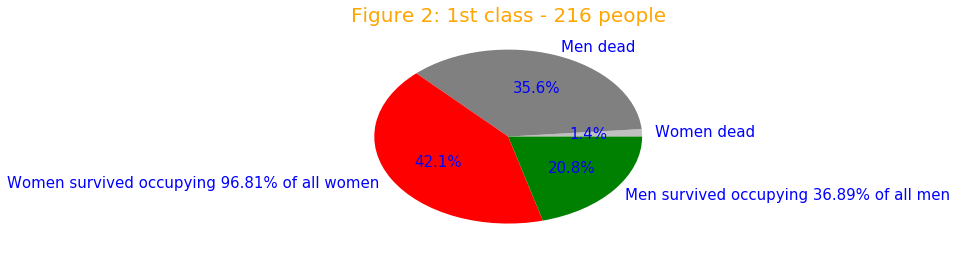

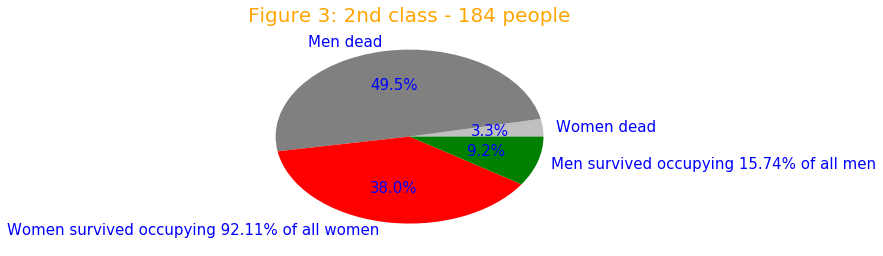

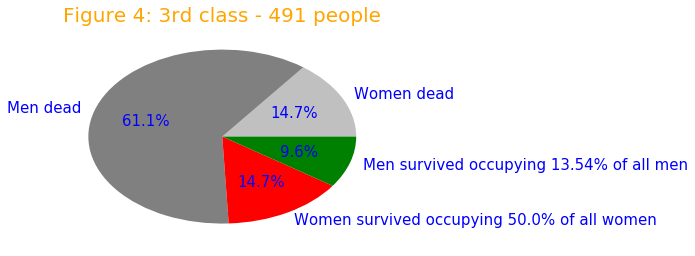

In [11]:
# for each of 3 different classes
for i in range(1,4,1):
    #group data by Survived and Gender fields, get number of people in 4 different groups: 
    #women dead, men dead, women survived, men survived. 
    gender = data[data.Pclass==i].groupby(['Survived','Sex']).size() 
    
    #get number of all people in this class
    allnum = gender.sum()
    
    #get percentage of the people of each group
    gender_per = gender*1.0*100/allnum
    
    #get percentage of survived women in all women and survived men in all men.
    labels = ['Women dead','Men dead',
              'Women survived occupying '+str(round((gender.iloc[2]/(gender.iloc[0]+gender.iloc[2]))*100,2))+'% of all women',
              'Men survived occupying '+str(round((gender.iloc[3]/(gender.iloc[1]+gender.iloc[3]))*100,2))+'% of all men']

    
    #plot pie to show percentage of survived/dead women/men in this class
    plt.pie(gender_per,labels=labels,autopct='%1.1f%%',colors=('silver','grey','red','green'),radius=1)
    if i == 1:
        plt.title('Figure 2: 1st class - '+str(num.iloc[0])+' people',size=20,color='orange')
    elif i == 2:
        plt.title('Figure 3: 2nd class - '+str(num.iloc[1])+' people',size=20,color='orange')
    else:
        plt.title('Figure 4: 3rd class - '+str(num.iloc[2])+' people',size=20,color='orange')
    plt.rcParams['text.color'] = 'blue'
    plt.rc('font',size=15)
    
    plt.show()


<p style="color:red"> Each of the above pie charts shows percentage of survived/dead women/men in a class.</p>

<p style = "color:red">Figure 2 showed that around 97% of women survived while 37% of men survived in the 1st class;</p>
<p style = "color:red">Figure 3 showed that around 92% of women survived while 16% of men survived in the 2nd class;</p>
<p style = "color:red">Figure 4 showed that around 50% of women survived while 14% of men survived in the 3rd class.</p>

<p style = "color:red">So the answer for question b) is 'Yes, women were given priority to the lifeboat in all classes.'</p>

<h2> 2.3 Were women given priority to the lifeboat in different classes? </h2>
<h3> 2.3.1 Data wrangling </h3>
<p> Look through the file to check whether there were invalid or Nan value for key fields - Age, Pclass. Remove people with invalid or Nan value of 'Age' field from dataset, scatter plot age data of left records. </p>

number of records after removing Age=Non data:  714


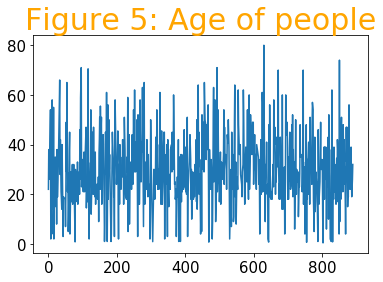

In [16]:
#select records with real number for 'Age'
data=data[data.Age > 0]
print ('number of records after removing Age=Non data: ',len(data))
Ages = data['Age']
plt.plot(Ages)
plt.title('Figure 5: Age of people',size=30,color='orange')
plt.show()

<p style="color:red"> There were 714 people having the value of age in the data file. The above figure 5 showed that most of the people were betwwen age 20 to 40, there were a few seniors and kids.</p>

<h3> 2.3.2 histogram and reports</h3>
<p> Classify data into different age groups according to the value of Age field:</br> 
    Infants(0-2) Children(3-12) Adolescence(13-18) YoungAdults(19-34) Adults(35-60) Seinors(>61)</p>
<p> Get number of survived/dead people in different age groups and classes.</p>
<p> Plot histogram showing percentage of survived people in different age groups for each class.</p>

             Age Group  Pclass  number of survived  number of all  \
0         Infants(0-2)       1                   1              2   
1         Infants(0-2)       2                   7              7   
2         Infants(0-2)       3                   7             15   
3       Children(3-12)       1                   2              2   
4       Children(3-12)       2                  10             10   
5       Children(3-12)       3                  13             33   
6   Adolescence(13-18)       1                  11             12   
7   Adolescence(13-18)       2                   6             12   
8   Adolescence(13-18)       3                  13             46   
9   YoungAdults(19-34)       1                  41             57   
10  YoungAdults(19-34)       2                  40             91   
11  YoungAdults(19-34)       3                  45            191   
12       Adults(35-60)       1                  64             99   
13       Adults(35-60)       2    

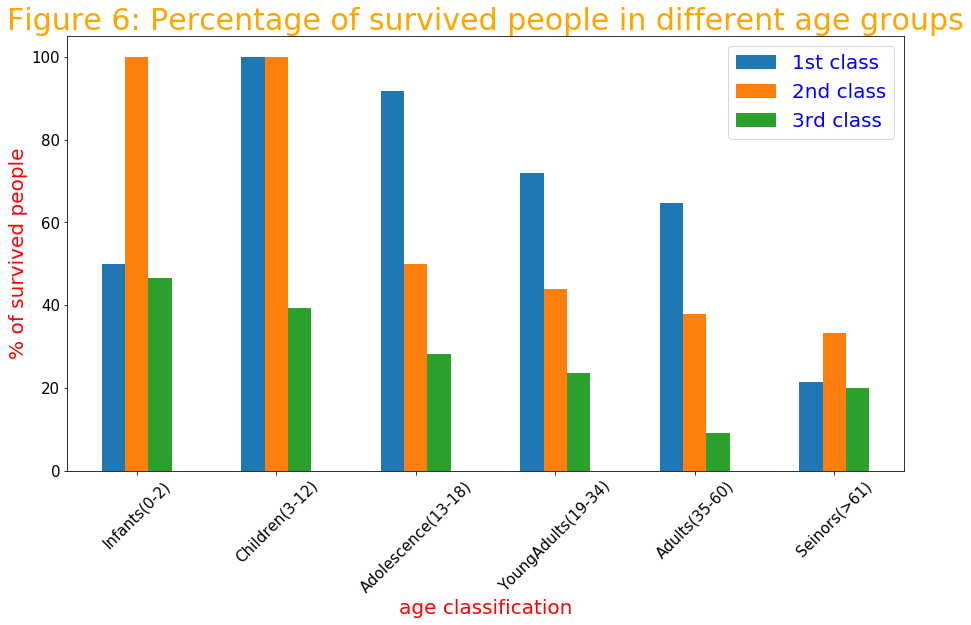

In [17]:
#add a column 'Age Group' into data, value it as following according to 'Age': 
#Infants(0-2), Children(3-12), Adolescence(13-18), YoungAdults(19-34), Adults(35-60), Seniors(>61)
data['Age Group'] = pd.cut(data['Age'],bins=[0,2,12,18,34,60,150],labels='Infants(0-2) Children(3-12) Adolescence(13-18) YoungAdults(19-34) Adults(35-60) Seinors(>61)'.split())

#select survived people, group the selected records by 'Age Group' and 'Pclass', get number of records in each group
sur = DataFrame({'number of survived':data[data.Survived == 1].groupby(['Age Group','Pclass']).size()}).reset_index() 

#group all data (including survived and dead) by 'Age Group' and 'Pclass'
#get number of people in each group, add this information into previous output sur as a new column 'number of all'
allnum = data.groupby(['Age Group','Pclass'],as_index=False).size().reset_index(name='number of all')
sur['number of all'] = allnum['number of all']

#get percentage of survived people in different age groups and classes 
sur['surviving percentage'] = round(sur['number of survived']*1.0*100/sur['number of all'],2)

print (sur)

#plot bar to show percentage of survived people in different age groups and classes
sur.pivot(index='Age Group', columns='Pclass', values='surviving percentage').plot(kind='bar',figsize=(15,8))
plt.xlabel('age classification',color='r',size=20)
plt.ylabel('% of survived people',color='r',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.legend(['1st class','2nd class','3rd class'],fontsize=20)
plt.title('Figure 6: Percentage of survived people in different age groups',size=30,color='orange')
plt.show()


<p style="color:red"> From Figure 6, we could see that:</br>
   In the 1st class, almost all kids under 18 years old survived.</br>
   In the 2nd class, almost all kids under 12 years old survived, and half of the ones between 12 and 18 years old survived.</br>
   In the 3rd class, less than 50% of infants, children and adolescence survived.</br></p>
<p style="color:red">So the answer for question c) is: "Yes, kids in more expensive class had more opportunity to survive." </p>

<h2> 2.4 Was there any relationship between the percentage of surviving people and their age?</h2>
<p>To answer this question, we plot scatter using data of age group and percentage of people survived in that age group 
for different classes, draw lines of best fit to check the linear relationship betwwen the 2 groups of data and answer question d)</p>

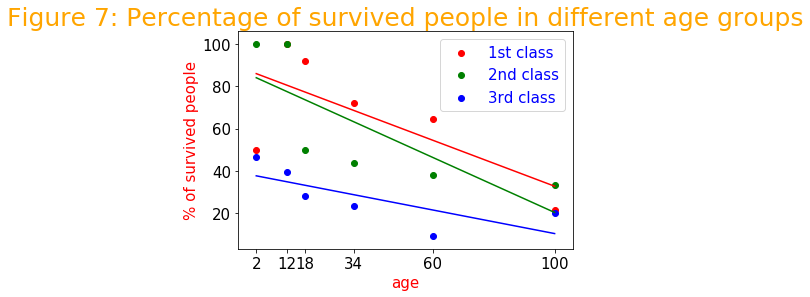

In [18]:
from numpy.polynomial import Polynomial

#create a list including the max number of age in each age group, use it as x when plotting scatter 
age_max = [2,12,18,34,60,100]

#plot scatter using x=age_max and y=percentage of survived people in corresponding age group in the 1st class
plt.scatter(age_max,sur[sur.Pclass==1]['surviving percentage'],color='r',label='1st class')

#plot scatter using x=age_max and y=percentage of survived people in corresponding age group in the 2nd class
plt.scatter(age_max,sur[sur.Pclass==2]['surviving percentage'],color='g',label='2nd class')

#plot scatter using x=age_max and y=percentage of survived people in corresponding age group in the 3rd class
plt.scatter(age_max,sur[sur.Pclass==3]['surviving percentage'],color='b',label='3rd class')

# for each class, fit the scatter points with a linear line to 
# check the relationship of the people's surviving percentage and their ages
f1 = Polynomial.fit(age_max,sur[sur.Pclass==1]['surviving percentage'],1)
f2 = Polynomial.fit(age_max,sur[sur.Pclass==2]['surviving percentage'],1)
f3 = Polynomial.fit(age_max,sur[sur.Pclass==3]['surviving percentage'],1)
plt.plot(*f1.linspace(),color='r')
plt.plot(*f2.linspace(),color='g')
plt.plot(*f3.linspace(),color='b')

#figure definition and show the plot
plt.xlabel('age',color='r')
plt.ylabel('% of survived people',color='r')
plt.xticks(age_max)
plt.title('Figure 7: Percentage of survived people in different age groups',color='orange',size=25)
plt.legend()
plt.figure(figsize=(20,15))
plt.show()

<p style="color:red"> In the above scatter plot, the point with x = 2 means percentage of people survived in age group 0-2 years old; the point with x = 12 means percentage of people survived in age group 3-12 years old; the point with age = 100 means percentage of people survived in age group 61-100 years old.</p>

<p style = "color:red">From the lines of best fit, we could see that the relationship between age group and percentage of people survived in that age group was positive correlation for all classes. </p>
<p style = "color:red">So the answer for question d) is "Yes, generally in all classes, the relationship between percentage of surviving people and their age was negative linear. Younger people had more opportunity to survive than elder people. People gave more opportunity to others who were younger than them to survive."</p>

<h1> 3. Conclusion and Limitation </h1>
<h2> 3.1 Conclusion </h2>
<p> 
<ol>
<li> The more expensive class people are in, the more chance they have to survive.</li>
<li> Women have more chance to survive than men. </li>
<li> Children have the most priority to survive. Younger people have more chance to survive than elder people. </li>
</ol>


<h2> 3.2 Limitations </h2>
<ol>
<li> The conclusion is just based on data of Titanic. To get good causation, it is better to have data of different 
disasters, that is also the future work to do.
<li> The sample data includes 891 passengers only, but there are overall 2224 people in titanic including passengers and the
crew, so the conclusion might be different if all data is collected and information of the crew is included.
<li> The number of kids in the sample data especially of the 1st class is very small, there are only 2 infants and 2 kids in
the 1st class, so the percentage of survived infants in the 1st class is only 50% may have bias. If more kids are included 
in the dataset, the percentage of survived kids in the 1st class might be increased to around 100%. 
</ol>
